### From Biological to Artificial Neurons

ANN (Artificial Neural Network) is inspired from the neurons found in our brains. The first architectural nn was based on how animal brains perform complex computations usign propositional logic. Today we have huge amount of data avaialble to train neural networks, which often outperform many other ML Techniques. The infrastructure is vastly improved, from powerful GPUs to cloud architectures, it's accessible to everyone. 

__Biological Neurons__

the biological neurons 
- composed of cell boy, containing the nucleus and most of the cell's complex components
- dendrites are the braching extensions
- axon is the very long extension
- at the extrmity of the axon splits into braches called the telodentria
- at the tip of these branches are minuscule structures called synaptic terminal which are connected to hte dendrites
- action potentials are the electrical impulses produced by axons
- synapes (or synaptic terminal) release the chemical called neurotransmitters

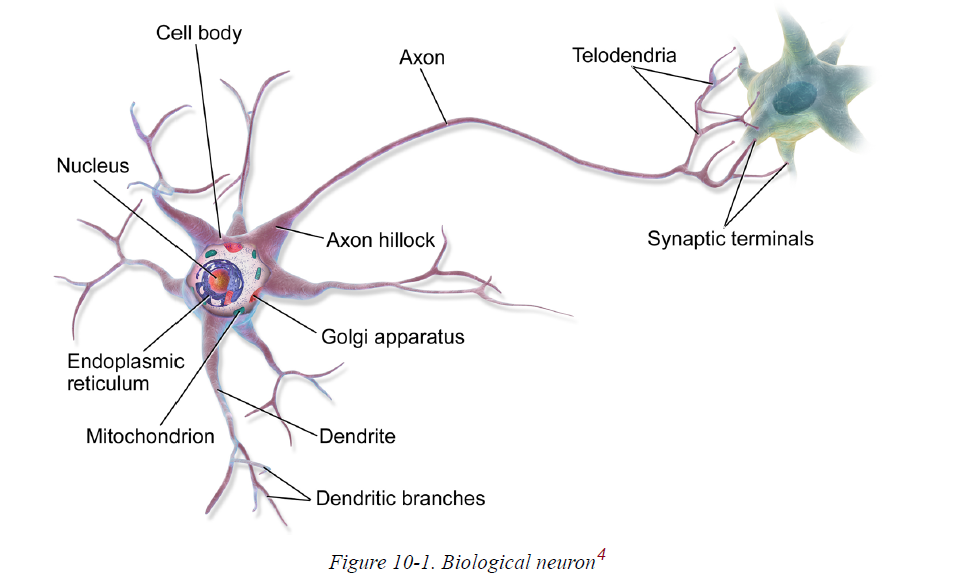


__Logical COmputations with Neurons__

First simple artificial neuron was binary output with multiple binary input. the AN activates when more than a certain number of inputs are active. this followed a logical flow of computation from inputs to outputs.

__Perceptron__

perceptron is one of the simplest ANN architecture (invented in 1957, by Frank Rosenblatt). It uses threshold logic unit (TLU), sometimes a linear threshold unit (LTU). The inputs and outputs are numbers (instead of binary) and each input conenction has a weight. the final input is the weighted sum of the inputs, which goes in the step function (most common - heaviside step function) and the output is the output of this step function. 

heaviside(z) = 0 if z< threshold else 1

A perceptron is composed of a single layer of TLUs with each TLU connected to all the inputs. 

- When all the neurons in the layer are connectec to the neurons in the previous layer, it's called fully connected layer (or dense layer)
- The inputs of the Perceptron are fed to special passthrough neurons called input neurons
- all the input neurons form the input layer
- an addtional bias term is add, called bias neuron

Computing the output of the fully connected layer

$h_{W,b}(X) = \phi (XW + b)$

- X is matrix of the input features
- W is matrix of the weights
- b is the bias vetor
- $\phi$ is the activation fuction

__Training a perceptron__

- Cells that file together, wire together (Hebb's rule / Hebbian Learning)
- Perceptrons are trained using a variant of this rule that takes into account the error made by the network when it makes a prediction
- the Perceptron learning rule reinforces connections that help reduce the error. More specifically, the Perceptron is fed one training instance at a time, and for each instance it makes its predictions. For every output neuron that produced a wrong prediction, it reinforces the connection weights from the inputs that would have contributed to the correct prediction.

$w_{i,j}^{(next step)} = w_{i,j} + η(y_j − ˆy_j)x_i$


- x is the input value
- ^y is the output  value
- y is the actual value
- w is the weight between the two instances
- η is the learning rate

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
iris = load_iris()

X = iris.data[:,(2,3)]
y = (iris.target ==0).astype(np.int)

In [3]:
per_clf = Perceptron()
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

Scikit-Learn’s Perceptron class is equivalent to using an SGDClassifier with the following hyperparameters: 
- loss="perceptron", 
- learning_rate="constant",
- eta0=1 (the learning rate),
- penalty=None (no regularization).

Perceptron do not output a class probability, they make predictions based on hard threshold. 

__The Multilayer Perceptron and Backpropogation__

- An MLP is composed of one (passthrough) input layer,
- one or more layers of TLUs, called hidden layers, 
- and one final layer of TLUs called the output layer
- The layers close to the input layer are usually called the lower layers, 
- and the ones close to the outputs are usually called the upper layers. 
- Every layer except the output layer includes a bias neuron and is fully connected to the next layer.


Feedforward NN - when the flow is in one direction

Deep NN - when the ANN contains a deep stack of hidden layers.

__Backpropagation__

Backpropogation provides effecient calcuation of the weights in less numebr of passes. it can find out how each connection
weight and each bias term should be tweaked in order to reduce the error. Once it has these gradients, it just performs a regular Gradient Descent step, and the whole process is repeated until the network converges to the solution.

Working of backpropagation:

- handles mini batch at a time, and it goes through the full training set multiple times. Each time is called an _epoch_
- each mini batch is passed to the network's input layer, which sends it to the first hidden layer.
    - the algorithms then computes the output of all the neurons in this layer. 
    - The result is passed to the next layer, its output is computed an passed to the next latyer and so on 
    - until we get the output of the last layer
    - this is forward pass
- next the algorithm measures the netowrk's output error
- then it computes how much each output connection contributed to the error. it's done using _chain rule_
- then it measures how much of these error contributions came form each connection in the layer below, again using the chain rule
- finally, it performs the gradient descent step to tweak all the connection weights in the network, using the error gradients it just compared

In order for this algorithm to work properly, the step function is replaced with the logistic (sigmoid) function, σ(z) = 1 / (1 + exp(–z)). since step function contains only flat segments, so there is no gradient to work with while the logistic
function has a well-defined nonzero derivative everywhere, allowing Gradient Descent to make some progress at every step.

the algo works well with many other activation functions, not just the logistic function.

- hyperbolic tangent function tanh(z) = 2 $\sigma$ (2z) - 1
    - this is S-shaped
    - continous
    - differentiable
    - output value ranges from -1 to 1
    - the range tends to make each laer's output less centered around 0 at the beginning, speeding up the convergence
- rectified linear unit function ReLU(z) = max(0,z)
    - continuos
    - not differentiable at z =0 
    - derivative is 0 for z <0
    - in practce, it's faster to compute
    
Why do we need activation functions at all?

- if we chain linear transformations, the result is a linear transformation
- So if we don’t have some nonlinearity between layers, then even a deep stack of layers is equivalent to a single layer, and we can’t solve very complex problems with that. 
- Conversely, a large enough DNN with nonlinear activations can theoretically approximate any continuous function.


### Regression MLPs

MLPs can perform regression, we need one output neuron for regression which is the predicted value. for multi-variate regression, we need one neuron per class. 

__Activation Function__

- In general, we avoid a activation function at the output for regression, so the output is not bound by activation function.
- If we want a positive output always, then we can use ReLU activation function or we can use a softplus activation function, which is smooth vairant of the ReLU: softplus(z) = log(1+ exp(z)). it's close to 0 when z is negative, and close to z when z is positive. 
- if we want output to be in a range of values, then we can use the logistic function or the hyperbolic tangent and then scale the labels to the appropiate range.

__Loss Function__

- The loss function to use during training is typically the mean squared error,
- but if there are lot of outliers in the training set, we can use the mean absolute error instead. 
- Alternatively, we can use the Huber loss, which is a combination of both. Huber loss is quadratic when the error is less than a threshold, and linear when the error is larger than threshold


### Classification MLPs

MLPs can be used for classification. For binary classification problem, we need a single output neuron which can output one number btw 0 and 1, as a probability of the positive class. It can handle multilabel classification as well. these will have one output neuron for each label, and the probabilities might not add to one, sice it belongs to diff class.  We an also have multiclass classification with one output neuron for each class and all probabilities adding to one. The loss fucntion is the cross-entroopy loss, since we are predicting te probability distributions. 

| Hyperparameter | Binary clas. | Multilabel clas. | Multiclass clas.|
| :-: | :-: | :-: | :-:|
| Input and Hidden Layers| same as regression | same as regression | same as regression|
| #output neurons | 1 | 1/label | 1/class |
| Output layer activation | Logistic | Logistic | Softmax |
| Loss Function | Cross-Entropy | Cross-Entropy | Cross-Entropy|

### Implementing MLPs with Keras

Keras is a high-level Deep Learning API that allows us to easily build, train, evaluate and execute all sorts of neural networks. 

- Documentation: https://keras.io/
- Open Source: https://github.com/keras-team/keras

At present, we can chose from thrww deep learning libraries for backend: tensorflow, microsoft cognitive toolkit, theano. (multibackend keras)

Now, tensorflow also comes as a bundle with keras, tf.keras, but it only supports tensorflow at the  backend. it can provide some importatant features like tensorflow's data api. 

Another deep learning python library is pytorch. the API is similar to keras, hence it's easier to learn after keras.

In [5]:
import tensorflow as tf
from tensorflow import keras

In [6]:
tf.__version__

'2.6.0'

In [7]:
keras.__version__

'2.6.0'

In [8]:
tf.keras.__version__

'2.6.0'

### Building an Image Classifier using the Sequential API


using the faashion mnist dataset from keras

In [9]:
from keras import datasets

In [10]:
fmnist = datasets.fashion_mnist

In [11]:
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

Each image is a 2D array, unlike the 1D array in scikit dataset load. The pixel intensity is integer from 0-255 instead of float. 

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [14]:
X_test.shape

(10000, 28, 28)

In [15]:
X_train.dtype

dtype('uint8')

In [16]:
##Creating validation dataset and scaling the dataset

X_val, X_train = X_train[:5000],X_train[5000:]
y_val, y_train = y_train[:5000],y_train[5000:]

In [17]:
print(len(X_train),len(X_val),len(X_test))

55000 5000 10000


In [18]:
##Scaling

X_train, X_val, X_test = X_train/255.0, X_val/255.0,X_test/255.0

In [19]:
##labels from https://keras.io/api/datasets/fashion_mnist/#loaddata-function
labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [20]:
##Vaiualizing one instance
y_train[0]

4

In [21]:
labels[4]

'Coat'

(-0.5, 27.5, 27.5, -0.5)

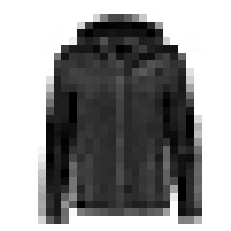

In [22]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

some_digit = X_train[0]
plt.imshow(some_digit,cmap ="binary")
plt.axis("off")

In [23]:
##Creating a model usign sequential API

model = keras.models.Sequential()

This creates a sequential model, it's the simplest keras models for neural network that are just composed of single stack of layers connected dequentially.

In [24]:
##Adding input layer
model.add(keras.layers.Flatten(input_shape = [28,28]))

This is the first layer for the model. It's a flatten layer whose role is to convert each input image into a 1D array. It computes X.reshape(-1,1) for X. There are not hyperparamters, it's only preprocessing step. 
we could have instead also used below ```keras.layers.InputLayer``` as first layer

In [25]:
##Adding second layer
model.add(keras.layers.Dense(300, activation = "relu"))

Next layer is a fully connected layer with 300 neurons with ReLU activation function. it manages it's own weight matrix, it also manages it's bias vector

In [26]:
##Adding second layer
model.add(keras.layers.Dense(100, activation = "relu"))

In [27]:
##Adding second layer
model.add(keras.layers.Dense(10, activation = "softmax"))

Next we add a hidden layer with 100 neurons. and then last layer is a dense layer withg 10 neurons and a softmax activation function, since the classes are exclusive.  Specifying activation="relu" is equivalent to specifying ```activation=keras.activations.relu```

In [28]:
##Instead of adding the layers one by one. we can do below

model = keras.models.Sequential([
keras.layers.Flatten(input_shape=[28, 28]),
keras.layers.Dense(300, activation="relu"),
keras.layers.Dense(100, activation="relu"),
keras.layers.Dense(10, activation="softmax")
])

In [29]:
model.summary() ##displays all the layers

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.layers

In [31]:
hidden1 = model.layers[1]

In [32]:
hidden1.name

'dense_3'

In [33]:
model.get_layer('dense_3') is hidden1

True

In [34]:
weights, biases = hidden1.get_weights()

In [35]:
weights

array([[-0.02477799,  0.04341962,  0.04701009, ...,  0.07221437,
         0.06872639,  0.06621282],
       [-0.07407495, -0.0666424 ,  0.0153779 , ..., -0.03611757,
        -0.05405717,  0.00523776],
       [-0.03908171,  0.00552543, -0.06444784, ...,  0.04254416,
         0.04599568, -0.03687372],
       ...,
       [-0.03219069, -0.07062575, -0.02708359, ..., -0.07146119,
         0.00301439, -0.07321571],
       [ 0.04635118, -0.00066631,  0.00161069, ...,  0.02245696,
         0.02094262,  0.0013655 ],
       [ 0.06705959, -0.05050221, -0.06578816, ..., -0.00793182,
         0.06717579, -0.01604861]], dtype=float32)

In [36]:
weights.shape

(784, 300)

In [37]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [38]:
biases.shape

(300,)

the Dense layer initialized the connection weights randomly, and the biases were initialized to zeros. 

### Compiling the model

After a model is created, you must call its ```compile()``` method to specify the loss function and the optimizer to use. Optionally, you can specify a list of extra metrics to compute during training and evaluation

In [39]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd",metrics=["accuracy"])

__Loss__

- We use the "sparse_categorical_crossentropy" loss because we have sparse labels and the classes are exclusive. 
- If instead we had one target probability per class for each instance, then we would need to use the "categorical_crossentropy" loss instead. 
- If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the "binary_crossentropy" loss.

__Optimizer__

- Regarding the optimizer, "sgd" means that we will train the model using simple Stochastic Gradient Descent. 
- In other words, Keras will perform the backpropagation algorithm described earlier

__Metrics__

- Since it's a classifer, we are usign accuracy

### Training and Evaluating the model

using fit()

In [40]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_val, y_val))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.7049 - accuracy: 0.7680 - val_loss: 0.5285 - val_accuracy: 0.8160
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4837 - accuracy: 0.8321 - val_loss: 0.4337 - val_accuracy: 0.8552
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4382 - accuracy: 0.8475 - val_loss: 0.4038 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4095 - accuracy: 0.8568 - val_loss: 0.3916 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3900 - accuracy: 0.8622 - val_loss: 0.3981 - val_accuracy: 0.8596
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3749 - accuracy: 0.8664 - val_loss: 0.3649 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3603 - accuracy: 0.8720 - val_loss: 0.3809 - val_accuracy:

The neural network is trained. At each epoch during training, Keras displays the number of instances processed so far (along
with a progress bar), the mean training time per sample, and the loss and accuracy (or any other extra metrics you asked for) on both the training set and the validation set.

Instead of passing a validation set using the validation_data argument, we could set validation_split to the ratio of the training set that you want Keras to use for validation. For example, validation_split=0.1 tells Keras to use the last 10% of the data (before shuffling) for validation.

If the training set was very skewed, with some classes being overrepresented and others underrepresented, it would be useful to set the class_weight argument when calling the fit() method, which would give a larger weight to underrepresented classes and a lower weight to overrepresented classes. These weights would be used by Keras when computing the loss. If you need per-instance weights, set the sample_weight argument (it supersedes class_weight). Per-instance weights could be useful if some instances were labeled by experts while others were labeled using a crowdsourcing platform: you might want to give more weight to the former. You can also provide sample weights (but not class weights) for the validation set by adding them as a third item in the validation_data tuple.

In [41]:
model.save('models/ch_10/keras_seq.h5')

In [42]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [43]:
history.epoch

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [44]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [45]:
history.history['loss']

[0.7049402594566345,
 0.4836750030517578,
 0.4381580352783203,
 0.40953850746154785,
 0.3899949789047241,
 0.3748793601989746,
 0.36027857661247253,
 0.34963735938072205,
 0.33808788657188416,
 0.3288154900074005,
 0.3201581537723541,
 0.3132689595222473,
 0.30527278780937195,
 0.29904747009277344,
 0.2915467917919159,
 0.28586214780807495,
 0.27986687421798706,
 0.2746863067150116,
 0.26993507146835327,
 0.26502731442451477,
 0.2599468231201172,
 0.25431033968925476,
 0.2506706118583679,
 0.24544046819210052,
 0.2422485202550888,
 0.2378271520137787,
 0.23389405012130737,
 0.22989220917224884,
 0.22668930888175964,
 0.22274263203144073]

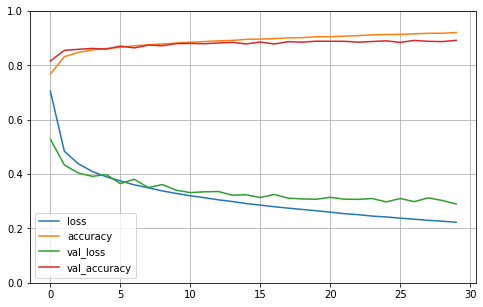

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

both the training accuracy and the validation accuracy steadily increase during training, while the training loss and the validation loss decrease. the validation error is calcualted after training error hence it has to be shifte by 0.5 epoch for plotting. Here, the training has not convergered since they completeyl overlap, and on convergence we epect the training error to outperform the validartion error. we can again call the fit() function and it starts training where it left off.

In [47]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3276 - accuracy: 0.8849


[0.32759949564933777, 0.8848999738693237]

#### Using model to make predictions

we can use ```predict()``` method to make prediction on new instances. 

In [48]:
X_new = X_test[:2]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [49]:
y_test[:2]

array([9, 2], dtype=uint8)

```predict()``` shows the prediction probability for all classes. ```predict_classes()``` shows the probabilities only for the relevant clases. (This is removed for the latest version of the tensorflow i.e. the one use here, hecne we can use np.argmax(y_proba,axis=1))

In [50]:
y_pred = np.argmax(y_proba,axis=1)
print(y_pred)

[9 2]


In [51]:
np.array(labels)[y_pred]

array(['Ankle boot', 'Pullover'], dtype='<U11')

In [52]:
def plot_fmnist(some_digit):
    plt.imshow(some_digit,cmap ="binary")
    plt.axis("off")
    plt.show()

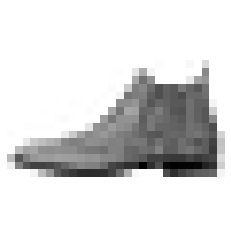

In [53]:
plot_fmnist(X_test[0])

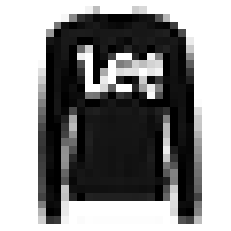

In [54]:
plot_fmnist(X_test[1])

### Building a Regression MLP usign Sequential API

using scikit learn dataset to get the data

In [55]:
from sklearn.datasets import fetch_california_housing as fch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
housing = fch()
X = housing.data
y = housing.target

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [60]:
from joblib import dump
dump(scaler,'models/ch_10/housing_scaler.pkl')

['models/ch_10/housing_scaler.pkl']

In [61]:
##We can add same layer as earlier, since it's a regression task we need only one neuron in outer layer

model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

In [62]:
model.compile(loss = "mean_squared_error", optimizer = "sgd")

In [63]:
history_housing = model.fit(X_train, y_train, epochs = 25, validation_data = (X_val, y_val)) 

Epoch 1/25
363/363 [==============================] - 1s 3ms/step - loss: 1.0088 - val_loss: 0.6872
Epoch 2/25
363/363 [==============================] - 1s 2ms/step - loss: 0.5159 - val_loss: 0.4455
Epoch 3/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4730 - val_loss: 0.4466
Epoch 4/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4527 - val_loss: 0.4216
Epoch 5/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4373 - val_loss: 0.4096
Epoch 6/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4314 - val_loss: 0.4126
Epoch 7/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4192 - val_loss: 0.3982
Epoch 8/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4143 - val_loss: 0.3940
Epoch 9/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4075 - val_loss: 0.3926
Epoch 10/25
363/363 [==============================] - 1s 2ms/step - loss: 0.4070 - val_loss: 0.4056

In [64]:
model.save('models/ch_10/housing_keras.h5')

In [65]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.3760


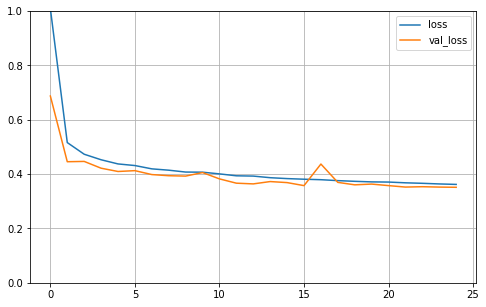

In [66]:
pd.DataFrame(history_housing.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [67]:
X_new = X_test[:3]
y_pred = model.predict(X_new)
print(y_pred, y_test[:3])

[[0.95050555]
 [1.783365  ]
 [2.3591685 ]] [1.    1.253 1.776]


### Building Complex Models using the functional API

One example of non sequential NN is a wide and deep NN. it connects all or part of the inputs directly to the output layer. it makes it possible for the NN to learn both deep patterns and simple rules. in contrast, the regular MLP forces all the data to flow throug the same full stack of the laters. 

building model iwth function api for california housing data

In [68]:
input_ = keras.layers.Input(shape = X_train.shape[1:])

This specifies the input the model with get, we can have multiple inputs.

In [69]:
from keras.layers import Dense, Concatenate, Input

In [70]:
hidden1 = Dense(30, activation = "relu")(input_)

this hidden1 layers is connected with input layer as spefied in the end

In [71]:
hidden2 = Dense(30, activation = "relu")(hidden1)

second hidden layer is connected with the 1st hidden layer, i.e. it takes input from hidden1

In [72]:
concat = Concatenate()([input_,hidden2])

here we are concatenating the output of the input and hidden2 layer, we will input this in the final layer.

In [73]:
output = Dense(1)(concat)

In [74]:
model = keras.Model(inputs = [input_], outputs = [output])

the final model is created

In [75]:
def train_evaluate_regression(model,model_name, p_loss = "mean_squared_error", p_optimizer = "sgd",epc = 25):
    model.compile(loss = p_loss, optimizer = p_optimizer)
    print('Training')
    history = model.fit(X_train, y_train, epochs = epc, validation_data = (X_val, y_val)) 
    print('Plotting loss')
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()
    print('Savign the model')
    model.save(''.join(['models/ch_10/',model_name,'.h5']))
    print('Evaluating on test set')
    mse_test = model.evaluate(X_test, y_test)

Training
Epoch 1/2
363/363 [==============================] - 1s 3ms/step - loss: 2.8916 - val_loss: 2.8943
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: nan - val_loss: nan
Plotting loss


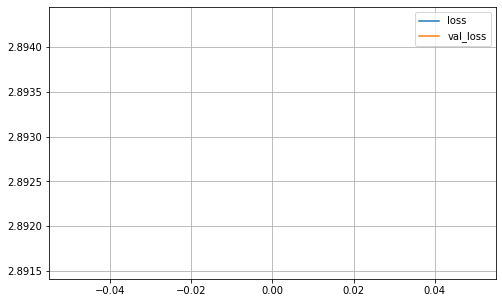

Savign the model
Evaluating on test set
162/162 [==============================] - 0s 2ms/step - loss: nan


In [76]:
train_evaluate_regression(model,'housing_keras_function',"mean_squared_error","sgd",2)

__If we want to send a subset of features by different paths__

in this case we can use multiple inputs

In [77]:
input_A = Input(shape = [5], name = 'wide')
input_B = Input(shape = [6], name = 'deep')
hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = Dense(1, name ='output')(concat)

In [78]:
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [79]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_val[:, :5], X_val[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [80]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

C:\Users\apurv\anaconda3\envs\hands-on-ml-book\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [81]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_val))

Epoch 1/20
363/363 [==============================] - 1s 3ms/step - loss: 2.6776 - val_loss: 1.1443
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8803 - val_loss: 0.7495
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7028 - val_loss: 0.6557
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6454 - val_loss: 0.6099
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6126 - val_loss: 0.5800
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5885 - val_loss: 0.5555
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5694 - val_loss: 0.5361
Epoch 8/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5540 - val_loss: 0.5218
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5412 - val_loss: 0.5091
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5304 - val_loss: 0.4994

In [82]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4841


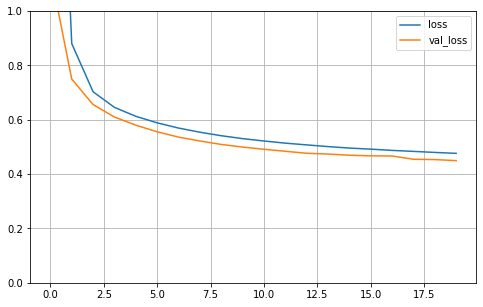

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [84]:
model.save(''.join(['models/ch_10/','keras_wide_deep','.h5']))

In [85]:
y_pred = model.predict((X_new_A, X_new_B))

In [86]:
y_pred

array([[1.0686252],
       [1.9616485],
       [2.45022  ]], dtype=float32)

We may need multiple outputs in many cases, like:

- the task demands it
- we may have multiple dependent task based on same data
- regularization task

to add extra output we can connect them to the appropiate layers and add them to our model's output. 

In [87]:
##adding to the last model

input_A = Input(shape = [5], name = 'wide')
input_B = Input(shape = [6], name = 'deep')
hidden1 = Dense(30, activation = "relu")(input_B)
hidden2 = Dense(30, activation = "relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])

output = Dense(1, name ='main_output')(concat)
aux_output = Dense(1, name ='aux_output')(hidden2)

model = keras.Model(inputs = [input_A,input_B], outputs = [output, aux_output])

Each output will need a loss function. therefore, on compiling we pass a list of losses. if we pass on loss, it will be used for all the outputs. 

In [88]:
model.compile(loss = ["mse","mse"], loss_weights = [0.9,0.1], optimizer = "sgd")

In [89]:
history = model.fit([X_train_A,X_train_B], [y_train, y_train], epochs = 20, validation_data = ([X_valid_A, X_valid_B], [y_val, y_val]))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9150 - main_output_loss: 0.7927 - aux_output_loss: 2.0164 - val_loss: 0.7051 - val_main_output_loss: 0.6309 - val_aux_output_loss: 1.3731
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6089 - main_output_loss: 0.5438 - aux_output_loss: 1.1943 - val_loss: 0.6007 - val_main_output_loss: 0.5497 - val_aux_output_loss: 1.0594
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5398 - main_output_loss: 0.4914 - aux_output_loss: 0.9757 - val_loss: 0.4879 - val_main_output_loss: 0.4443 - val_aux_output_loss: 0.8802
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4996 - main_output_loss: 0.4621 - aux_output_loss: 0.8363 - val_loss: 0.4699 - val_main_output_loss: 0.4370 - val_aux_output_loss: 0.7663
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4791 - main_output_loss: 0.4492 - aux_output_loss: 0.7486 - val_loss

In [90]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A,X_test_B],[y_test,y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.3789 - main_output_loss: 0.3653 - aux_output_loss: 0.5014


In [91]:
model.save('models/ch_10/2_inputs_2_outputs.h5')

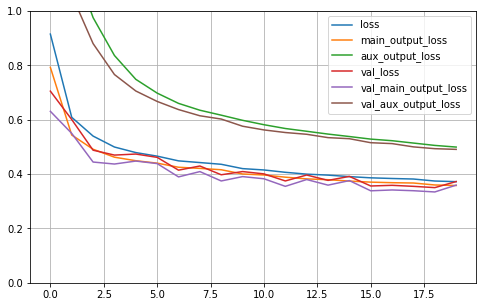

In [92]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [93]:
y_pred_main, y_pred_aux = model.predict([X_new_A,X_new_B])

In [94]:
print(y_pred_main,y_pred_aux)

[[0.93198884]
 [1.6489842 ]
 [2.3287416 ]] [[1.5073193]
 [1.7741817]
 [2.432131 ]]


### Using the Sublcassing API to build Dynamic models

sequential API and functional API are decalrative, we define the layers and declare how they should be connected, then we start feedign the model. these can be easily represented in graphs, but they are static. some models involve loops, varying shaped, conditional branching and other dynamic behaviors. in these cases, we can prefer a imperatieve programming style, the subclassing APIs. 

we can subclass the model class and create laters in the contructor and use them in the call() method. 

In [95]:
##subclassing a wide and deep model

class wide_and_deep_model(keras.Model):
    def __init__(self, units = 30, activation = "relu", **kwargs):
        super().__init__(**kwargs) ##for stangard args
        self.hidden1 = keras.layers.Dense(units, activation = activation)
        self.hidden2 = keras.layers.Dense(units, activation = activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = wide_and_deep_model()

we can add loops and if esle inside the call function. this model provides extra flexibility but since it's hidden in a class, keras cannot inspect it. we only get the list of layers and not how they are connected. 

keras models can act as a layer and multiple models can be combined together to vreate a new model. 


### Saving and Loading Model and Checkpoints

__Saving model__

`model.save('<model_name>.h5')`

Keras will use the HDF5 format to save both the model’s architecture (including every layer’s hyperparameters) and the values of all the model parameters for every layer (e.g., connection weights and biases). It also saves the optimizer (including its hyperparameters and any state it may have).

__loading the model__

```model = keras.models.load_model("<model_name>.h5")```

This will work when using the Sequential API or the Functional API, but unfortunately not when using model subclassing. You can use save_weights() and load_weights() to at least save and restore the model parameters, but you will need to save and restore
everything else yourself.

__Saving Checkpoints__


for longer training, we can save checkpoints instead of waiting for full training to complete. we can do so by using callbacks.
fit() method accepts callbacks argument that allows us to specify the list of objects that keras will call at the start and end of the training. ex. modelCheckpoint callback saves the checkpoints at regular intervals, by defualt at the end of each epoch.

In [102]:
model = keras.models.Sequential([
        keras.layers.Dense(30, activation = "relu", input_shape = X_train.shape[1:]),
        keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error", optimizer = "sgd")


In [103]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/checkpoint_test.h5")
history = model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 1.3333
Epoch 2/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4934
Epoch 3/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4384
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6614
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4040
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3947
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3928
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3877
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3830
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3786


Moreover, we can set save_best_only=True when creating the ModelCheckpoint. In this case, it will only save our model when its performance on the validation set is the best so far. This way, we do not need to worry about training for too long and overfitting the training set: simply restore the last model saved after training, and this will be the best model on the validation set.

#### Implementing early stopping

In [107]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/early_stopping_test.h5", save_best_only=True)

In [108]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val),callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3559 - val_loss: 0.3537
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3556 - val_loss: 0.3470
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3543 - val_loss: 0.3369
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3533 - val_loss: 0.3412
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3515 - val_loss: 0.3417
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3491 - val_loss: 0.3370
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3490 - val_loss: 0.3394
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3470 - val_loss: 0.3413
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3398
Epoch 10/10
363/363 [==============================] - 1s 2ms/step - loss: 0.3462 - val_loss: 0.3614

In [109]:
model = keras.models.load_model("models/ch_10/early_stopping_test.h5") # roll back to best model

Another method is to use `EarlyStopping` callback. It interrupts trainign when it measures no progress o nthe validation set for a number of epochs (defined by patience argument), ity will optionally rollback to the best model. we can combine callbacks to save checkpoints of the model.

In [110]:
es_cb = keras.callbacks.EarlyStopping(patience = 10, restore_best_weights = True)

#https://keras.io/api/callbacks/early_stopping/
#patience: Number of epochs with no improvement after which training will be stopped.
#restore_best_weights: Whether to restore model weights from the epoch with the best value of the monitored quantity. 

In [111]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("models/ch_10/early_stopping_test_cb.h5", save_best_only=True)

In [113]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), callbacks=[checkpoint_cb, es_cb])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3525 - val_loss: 0.3384
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3510 - val_loss: 0.3488
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3501 - val_loss: 0.3401
Epoch 4/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3493 - val_loss: 0.3622
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3473 - val_loss: 0.3436
Epoch 6/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3475 - val_loss: 0.3457
Epoch 7/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3454 - val_loss: 0.3403
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3452 - val_loss: 0.3418
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3431 - val_loss: 0.3482
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3428 - val_lo

The number of epochs can be set to a large value since training will stop automatically when there is no more progress. In this case, there is no need to restore the best model saved because the EarlyStopping callback will keep track of the best weights and restore them for you at the end of training.

we can write custom callbacks. ex: a callback will display the ratio btw val loss and training loss.

In [114]:
class print_ratio_loss_cb(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

we can similarly implement:

- on_train_begin()
- on_train_end()
- on_epoch_begin()
- on_epoch_end()
- on_batch_begin()
- and on_batch_end()

for evaluations and prediction, we can iumplement:

- on_test_begin()
- on_test_end()
- on_test_batch_begin()
- on_test_batch_end() (called by evaluate())

- on_predict_begin()
- on_predict_end()
- on_predict_batch_begin()
- on_predict_batch_end() (called by predict())\


### Using TensorBoard for Visualization


we can use tensorBoard for viewing learning curces during training, and comparing learning curves btw multiple runs, and analyzing training statistics. it's automatically installed on installing tensorflow. to use it, we need to modify the outputs to special binary log files called _event files_. each binary data record is called a _summary_. The TensorBoard server will monitor the log directory, and it will automatically pick up the changes and update the visualizations. 

TensorBoard server to a root log directory and configure your program so that it writes to a different subdirectory every time it runs. This way, the same TensorBoard server instance will allow you to visualize and compare data from multiple runs of your program, without getting everything mixed up.

In [136]:
import os
import time

In [137]:
os.curdir

'.'

In [138]:
root_logdir =  os.path.join(os.curdir, "logs")

In [139]:
time.strftime("run_%Y_%m_%d-%H_%M_%S")

'run_2021_10_14-11_43_04'

In [140]:
def get_run_logdir():
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

In [141]:
run_logdir = get_run_logdir()

In [142]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [143]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val),callbacks=[tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.3125 - val_loss: 0.3193
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3129 - val_loss: 0.3176
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3144 - val_loss: 0.3273
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3142 - val_loss: 0.3151
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3139 - val_loss: 0.3600
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3138 - val_loss: 0.3191
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3140 - val_loss: 0.3159
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3130 - val_loss: 0.3182
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3122 - val_loss: 0.3198
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3191 - val_loss: 0.3338

There’s one directory per run, each containing one subdirectory for training logs and one for validation logs. Both contain event files, but the training logs also include profiling traces: this allows TensorBoard to show you exactly how much time the model spent on each part of your model, across all your devices, which is great for locating performance bottlenecks. 

Next we launch tensorboard web interface usign the command:
`tensorboard --logdir=./logs --port=6006`
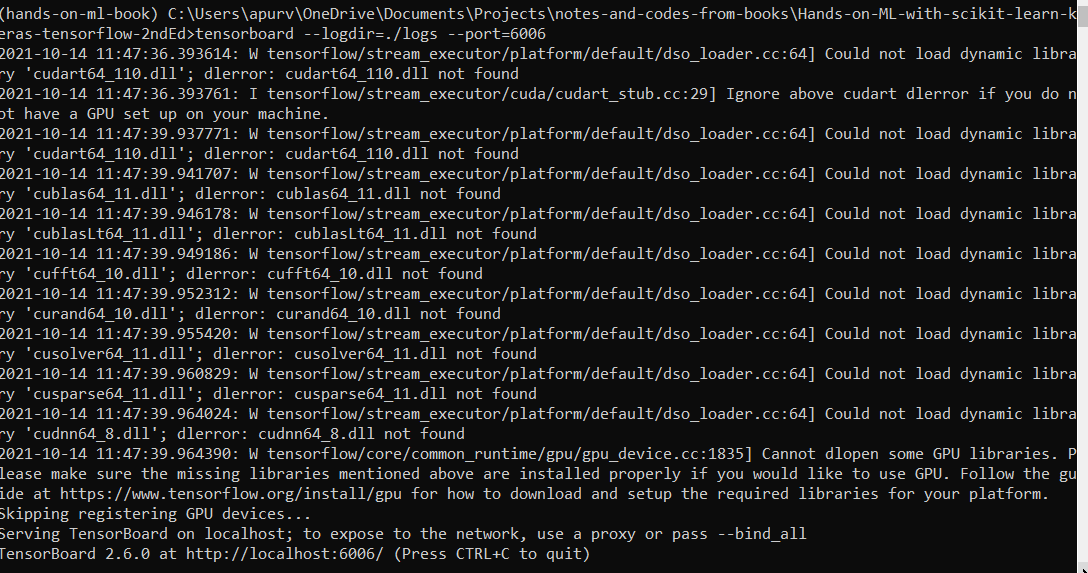

we can also visualize the whole graph, the learned weights (projected to 3D), or the profiling traces. The TensorBoard() callback has options to log extra data too, such as embeddings. Additionally, TensorFlow offers a lower-level API in the tf.summary package. The following code creates a SummaryWriter using the create_file_writer() function, and it uses this writer as a context to log scalars, histograms, images, audio, and text, all of which can then be visualized using TensorBoard

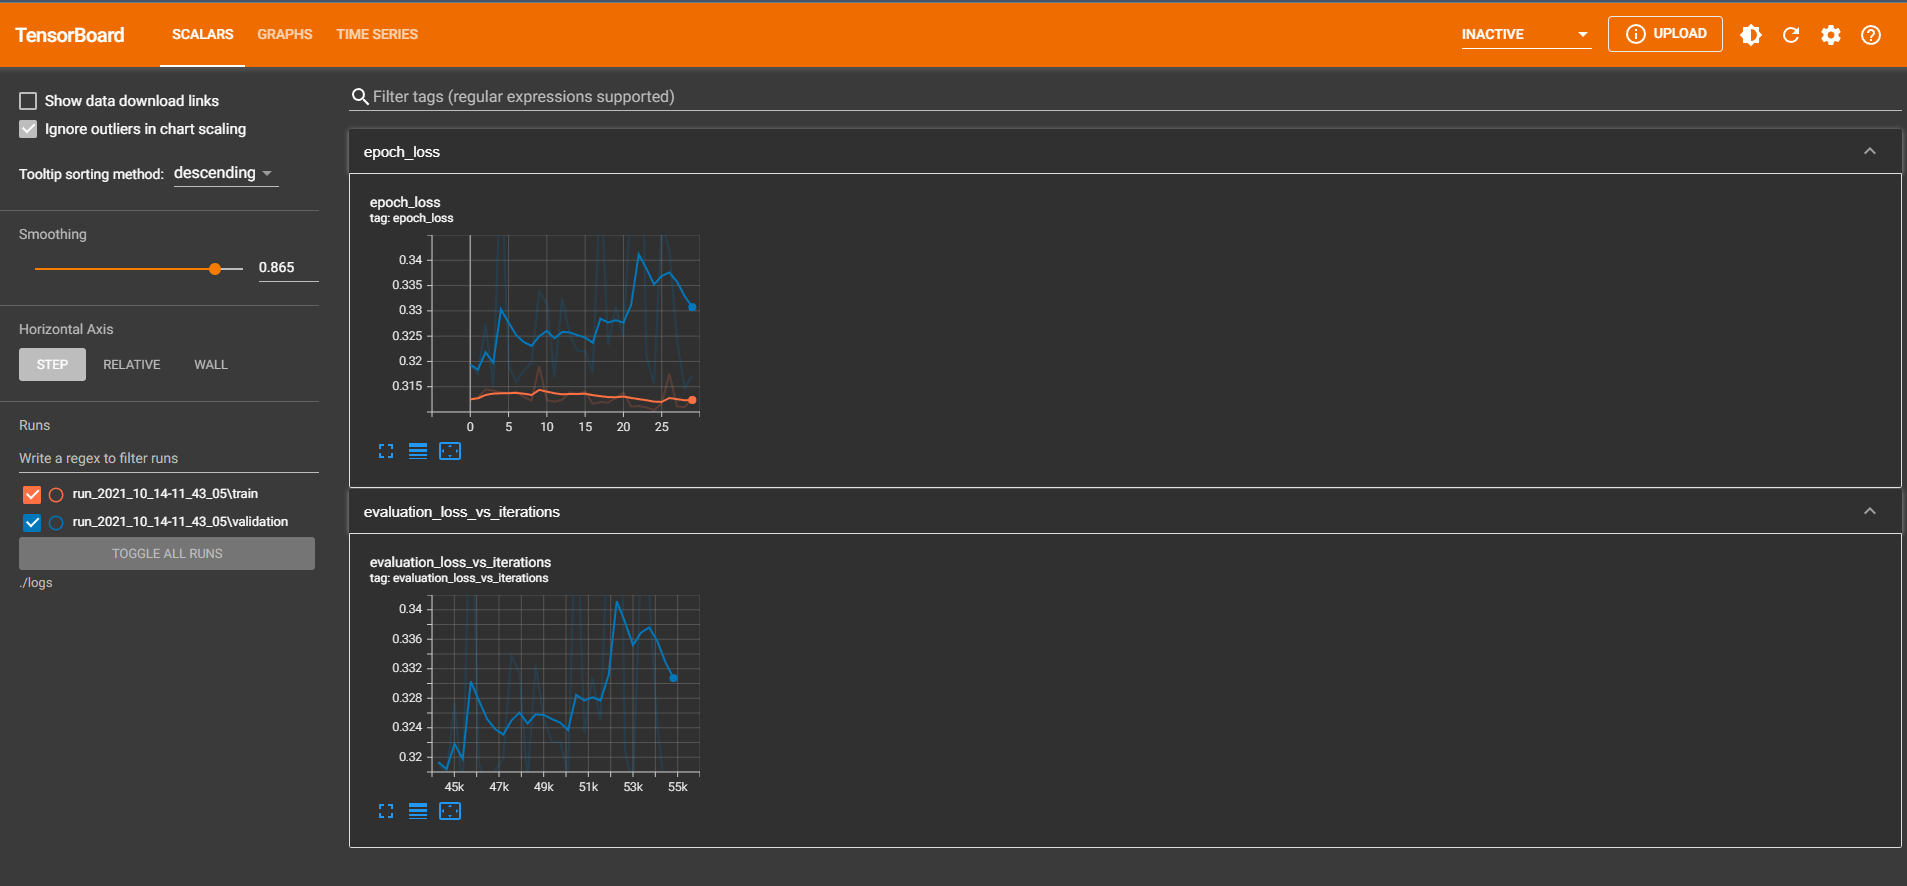

In [144]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(test_logdir)

In [145]:
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        data = (np.random.randn(100) + 2) * step / 100 # some random data
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        images = np.random.rand(2, 32, 32, 3) # random 32×32 RGB images
        tf.summary.image("my_images", images * step / 1000, step=step)
        texts = ["The step is " + str(step), "Its square is " + str(step**2)]
        tf.summary.text("my_text", texts, step=step)
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

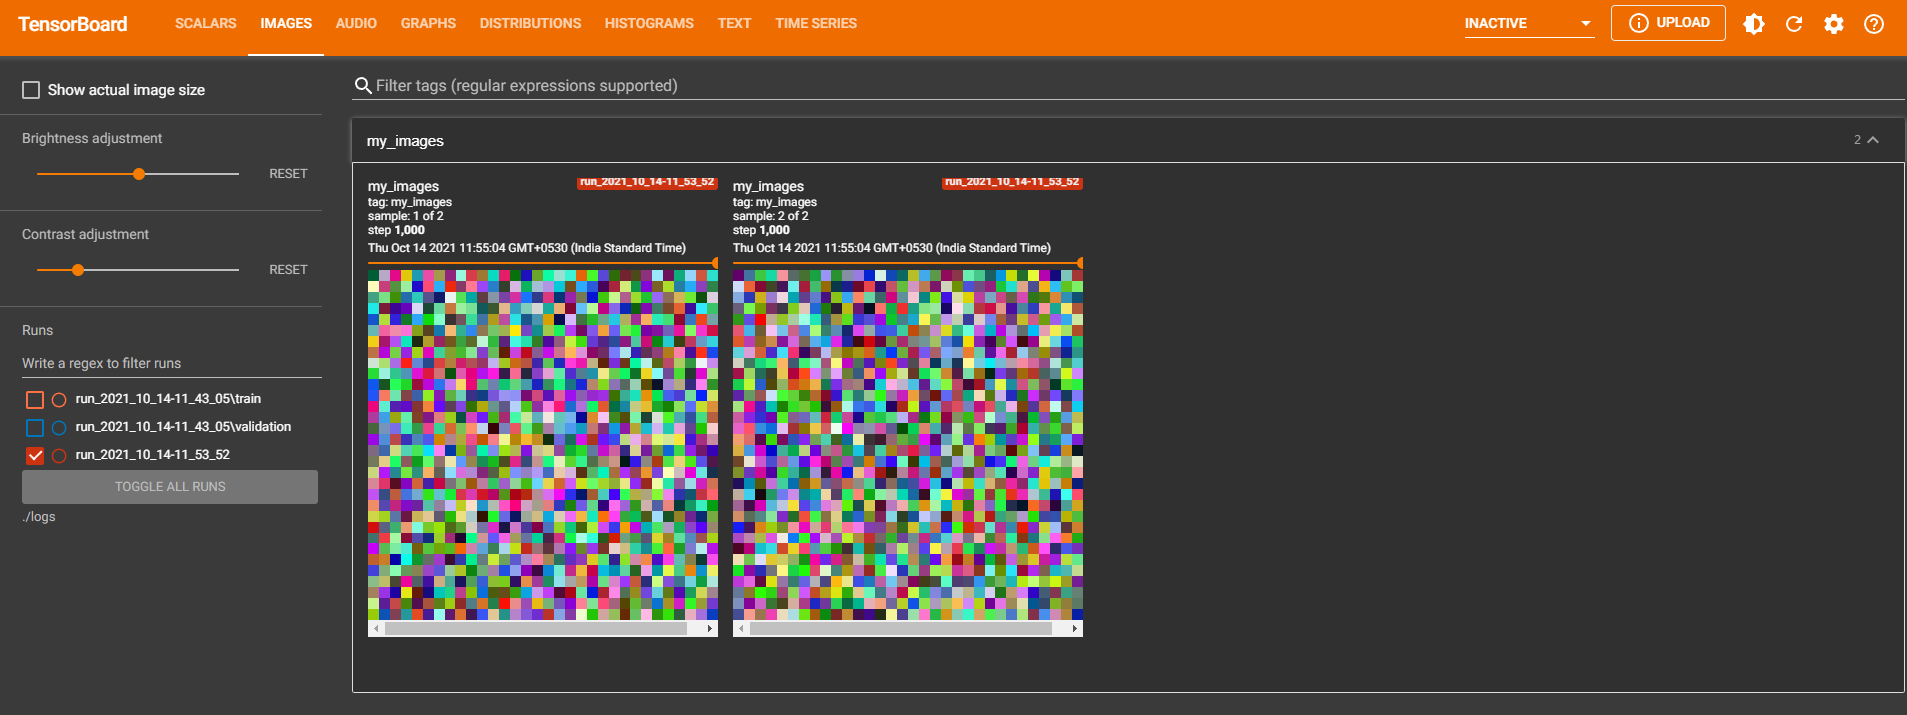

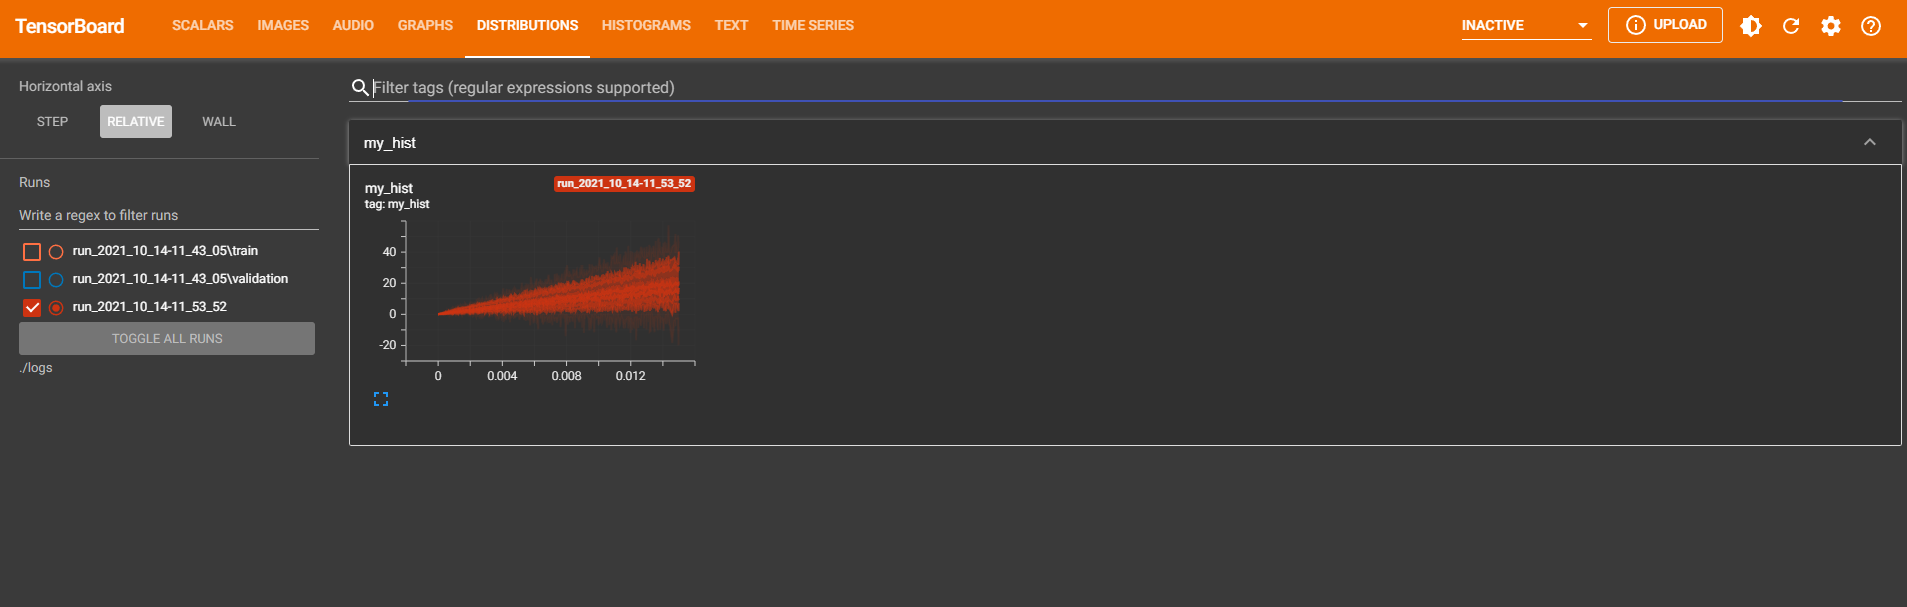

### Fine-Tuning Neural Network Hyperparameters

